In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from sklearn.model_selection import cross_val_score
%matplotlib inline

# EDA

In [2]:
banknotes= pd.read_csv('BankNoteAuthentication.csv' )

In [3]:
banknotes.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


* variance - jumlah di mana sesuatu berubah atau berbeda dari sesuatu yang lain
* skewness - skewness adalah jumlah dimana sesuatu berubah atau berbeda dari sesuatu yang lain
* curtosis - kurtosis mengacu pada keruncingan puncak kurva distribusi.
* entropy - ukuran ketidakteraturan atau ketidakpastian

C:\Users\Naufal Reky Ardhana\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Naufal Reky Ardhana\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Naufal Reky Ardhana\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Naufal Reky Ardhana\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldc

Dataset stats: 


,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


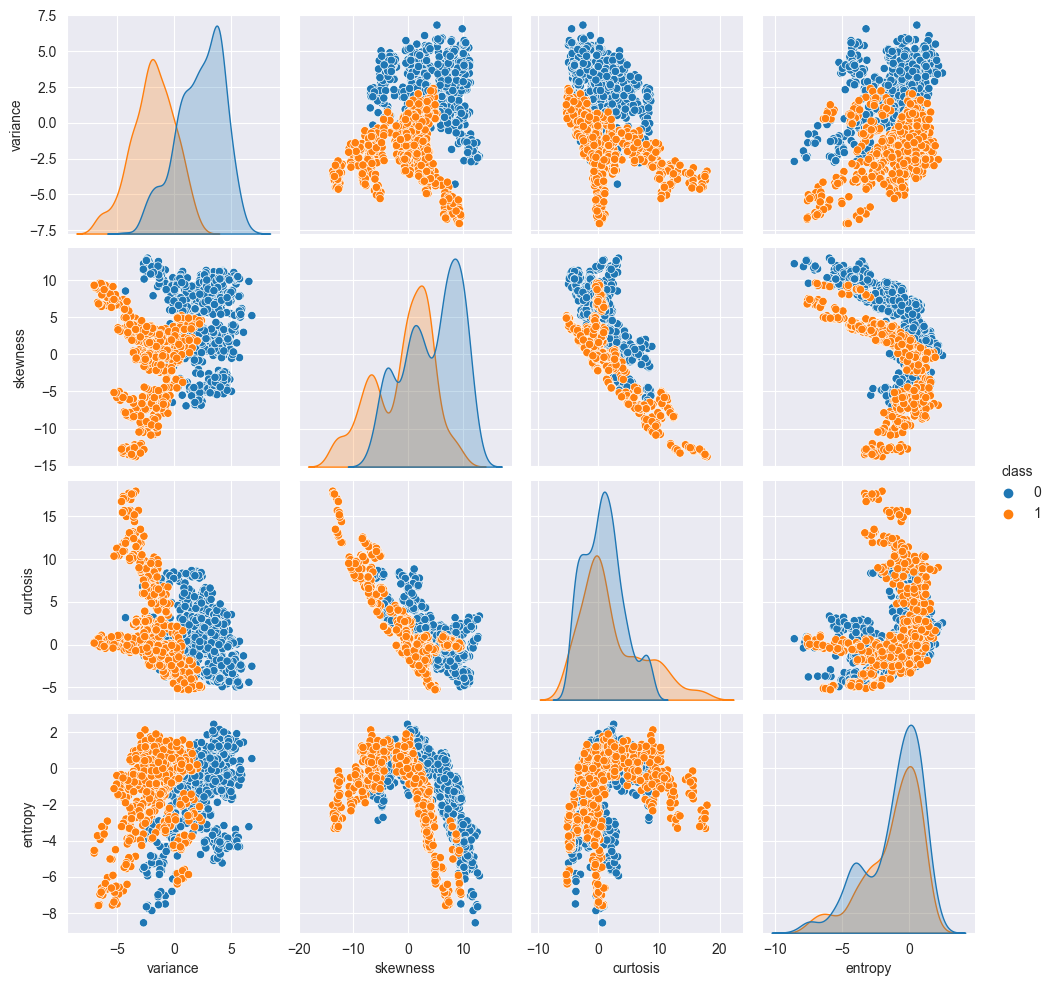

In [4]:
sns.pairplot(banknotes,hue='class')
print('Dataset stats: \n')
banknotes.describe()

In [5]:
banknotes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


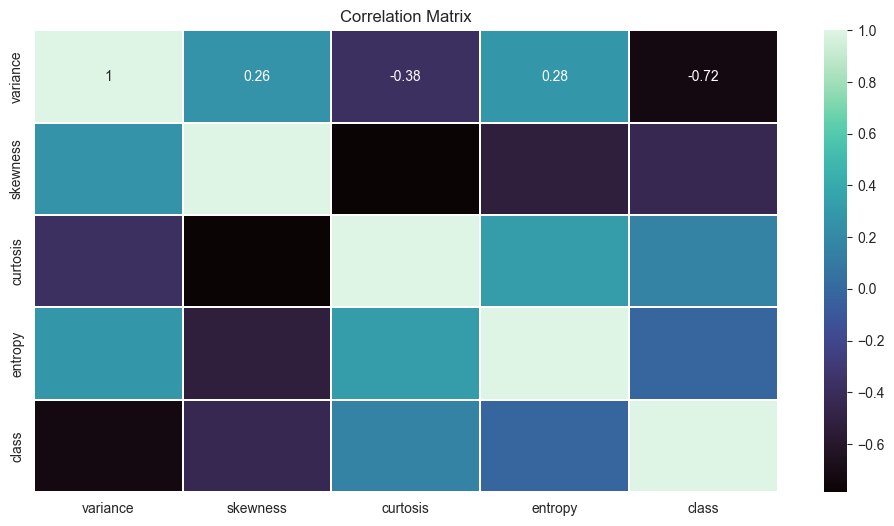

In [6]:
sns.heatmap(banknotes.corr(),annot=True,cmap='mako',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.title("Correlation Matrix")
plt.show()

C:\Users\Naufal Reky Ardhana\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Naufal Reky Ardhana\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 9.444444444444438, 'Variance')

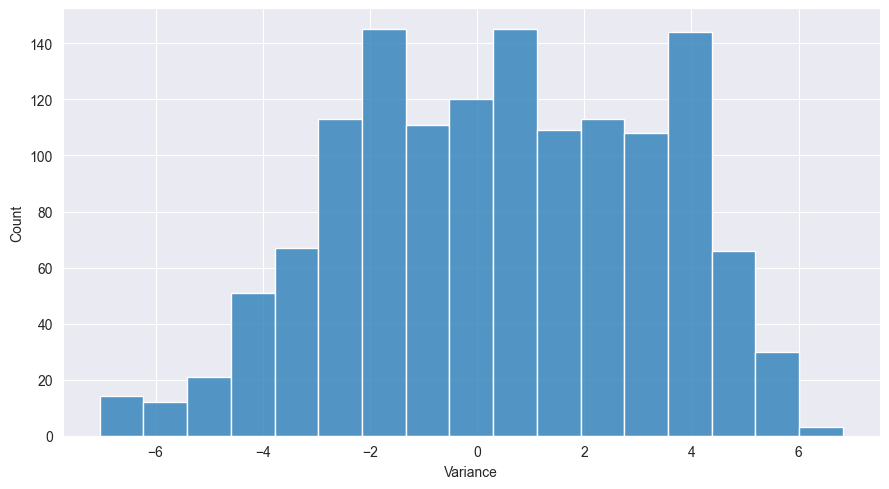

In [7]:
sns.displot(banknotes["variance"], height= 5, aspect=1.8)
plt.xlabel("Variance")

C:\Users\Naufal Reky Ardhana\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Naufal Reky Ardhana\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 9.444444444444438, 'Skewness')

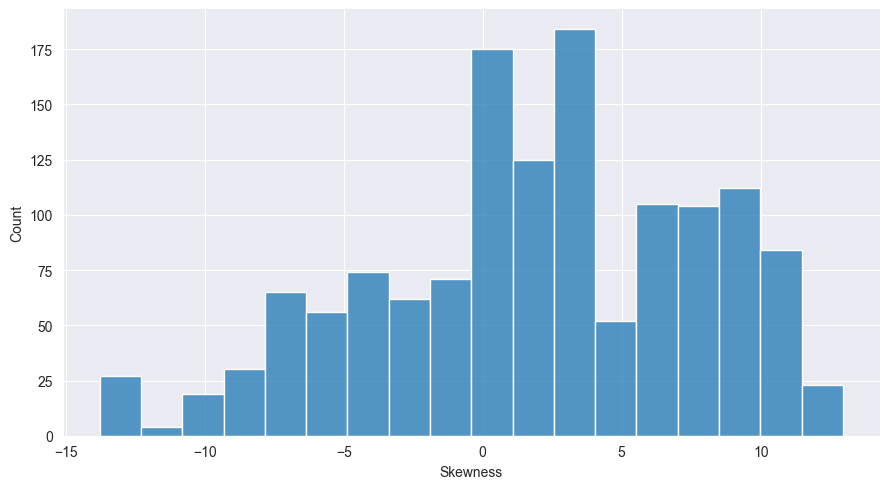

In [8]:
sns.displot(banknotes["skewness"], height= 5, aspect=1.8)
plt.xlabel("Skewness")

C:\Users\Naufal Reky Ardhana\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Naufal Reky Ardhana\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Naufal Reky Ardhana\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 0, 'Class')

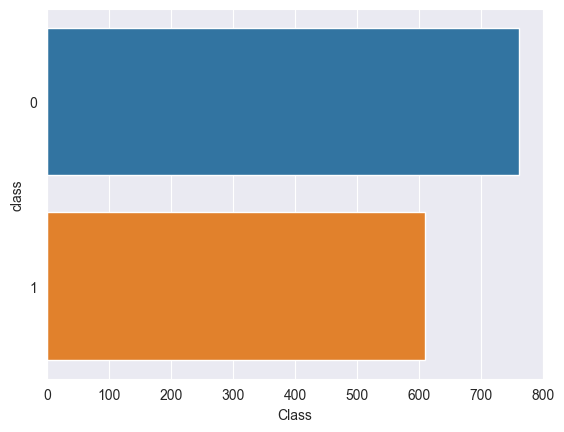

In [9]:
sns.countplot(data= banknotes, y="class")
plt.xlabel("Class")

In [10]:
X=banknotes[['variance','skewness']]

In [11]:
X.head()

,variance,skewness
0,3.62160,8.6661
1,4.54590,8.1674
2,3.86600,-2.6383
3,3.45660,9.5228
4,0.32924,-4.4552


In [12]:
y=banknotes[["class"]]

In [13]:
y.head()

,class
0,0
1,0
2,0
3,0
4,0


In [14]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.35,  random_state = 7)

In [15]:
scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

# Pembuatan model dan tradisional machine learning

In [16]:

results = {
    'Algorithm': [],
    'Accuracy': [],
    'F1-score': [],
    'Recall': []
}

traditional_models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
}

C:\Users\Naufal Reky Ardhana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Naufal Reky Ardhana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Naufal Reky Ardhana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Naufal Reky Ardhana\AppData\Local\Programs\Python\Python311\L

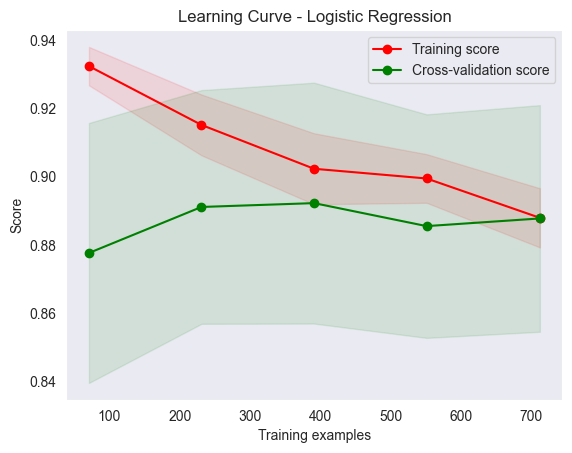

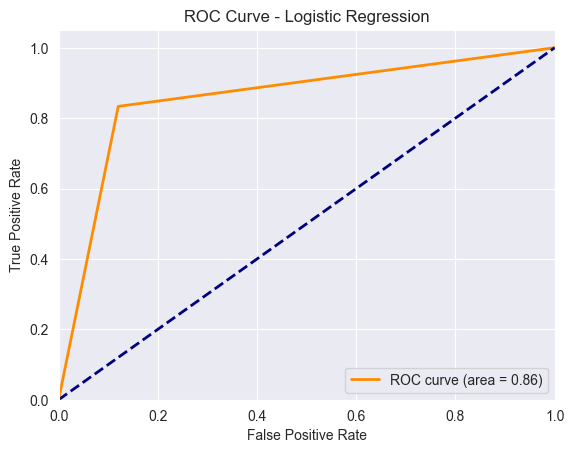

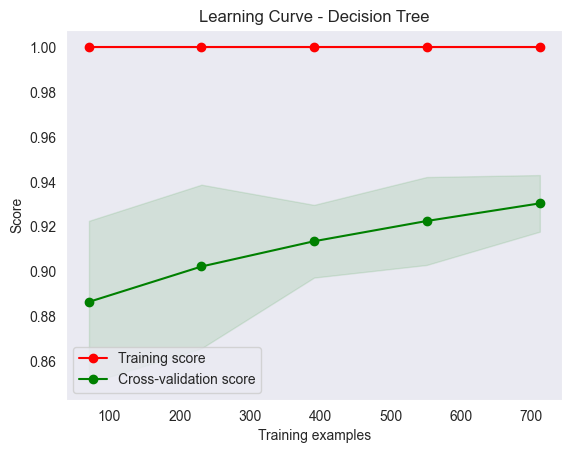

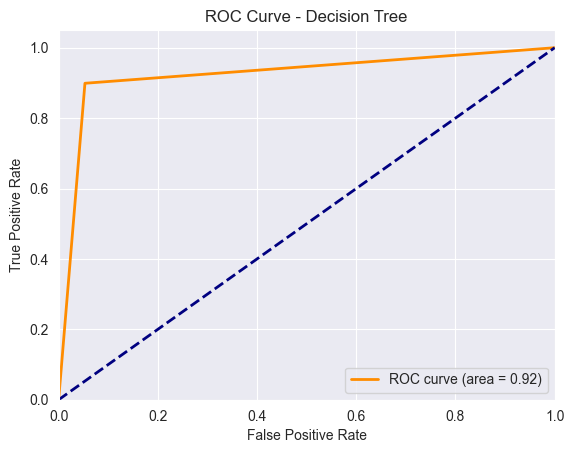

In [17]:
import numpy as np
for model_name, anggota_model in traditional_models.items():
    anggota_model.fit(train_X, train_y)
    predictions = anggota_model.predict(test_X)
    accuracy = accuracy_score(test_y, predictions)
    f1 = f1_score(test_y, predictions)
    recall = recall_score(test_y, predictions)
    
    # Menambahkan metrik ke dalam results
    results['Algorithm'].append(model_name)
    results['Accuracy'].append(accuracy)
    results['F1-score'].append(f1)
    results['Recall'].append(recall)
    
    # Plot learning curve
    train_sizes, train_scores, test_scores = learning_curve(anggota_model, train_X, train_y, cv=5)
    plt.figure()
    plt.title(f"Learning Curve - {model_name}")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")

    # Plot ROC curve
    fpr, tpr, thresholds = roc_curve(test_y, predictions)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

In [18]:
plt.show()
model = Sequential([
        Dense(64, input_dim=train_X.shape[1], activation='relu'),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

model.summary()

C:\Users\Naufal Reky Ardhana\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

The early stopping callback is useful since it allows for you to stop the model training if it no longer improves after a given number of epochs. To make use of this functionality you need to pass the callback inside a list to the model's callback parameter in the .fit() method.

In [19]:
monitor_val_acc = EarlyStopping(monitor='accuracy', mode="max",
                                patience=20)

history = model.fit(train_X, train_y,
                  epochs=100, validation_data=(test_X, test_y),
                  callbacks=[monitor_val_acc])

Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6329 - loss: 0.6768 - val_accuracy: 0.8233 - val_loss: 0.6524
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8581 - loss: 0.6425 - val_accuracy: 0.8773 - val_loss: 0.6228
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9134 - loss: 0.6078 - val_accuracy: 0.8940 - val_loss: 0.5929
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9194 - loss: 0.5813 - val_accuracy: 0.8940 - val_loss: 0.5633
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9042 - loss: 0.5500 - val_accuracy: 0.8877 - val_loss: 0.5317
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9084 - loss: 0.5176 - val_accuracy: 0.8857 - val_loss: 0.4975
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9019 - loss: 0.4808 - val_accuracy: 0.8857 - val_loss: 0.4610
Epoch 8/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8948 - loss: 0.4483 - val_accuracy: 0.8857 - v

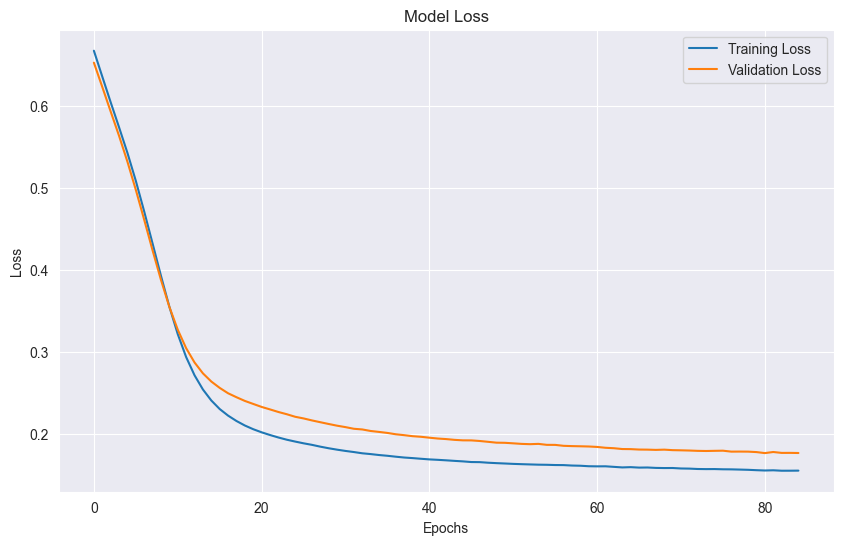

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [21]:
loss, accuracy = model.evaluate(test_X, test_y, verbose=0)

predictions_keras = (model.predict(test_X) > 0.5).astype("int32")

f1_keras = f1_score(test_y, predictions_keras)
recall_keras = recall_score(test_y, predictions_keras)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [22]:
results['Algorithm'].append('Keras Model')
results['Accuracy'].append(accuracy)
results['F1-score'].append(f1_keras)
results['Recall'].append(recall_keras)

results_df = pd.DataFrame(results)

In [23]:
results_df

,Algorithm,Accuracy,F1-score,Recall
0,Logistic Regression,0.860707,0.831234,0.833333
1,Decision Tree,0.927235,0.910486,0.898990
2,Keras Model,0.927235,0.913151,0.929293
